# Machine Learning in Agriculture(Project Dynamics number 10)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('train_agriculture.csv')
data2=pd.read_csv('test_agriculture.csv')
# A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. 
# While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.
# We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.
# ID-> Unique ID
# Estimated_Insects_Count-> estimated insects count per sq meter
# Corp_type -> category of corp (0,1)
# Soil_type -> category of soil (0,1)
# Pesticide Use Category -> frequnecy of pesticide usage (0=never used,1=before used, 2=currently using)
# Number_doses_week -> number of doses per week 
# Number_weeks_used -> number of weeks used 
# Number_weeks_quit -> Number of weeks quit
# Season -> season Category(1,2,3)
# Crop_Damage -> crop damage catagory (0=crop is alive, 1=crop damaged due to other causes,2=crop damaged due to pesticides)
# Target -> Crop_Damage

In [3]:
df1=pd.DataFrame(data=data1) # Training Dataset 
df2=pd.DataFrame(data=data2) # Testing Dataset

# EDA

In [4]:
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
df1.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
df1.info()
# dataset contains 4599 entries and 10 attributes
# datatype -> 1 object, others numerical (1 float & 8 integer)
# one feture attribute conatains missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df1n=df1.drop('ID',axis=1)
df1n.head()
# lets drop the ID column since its of no use to predict the outcome

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [8]:
df1n['Number_Weeks_Used']=df1n['Number_Weeks_Used'].replace(np.NaN,df1n['Number_Weeks_Used'].mean())
# filling the missing rows with mean value

In [9]:
df1n.shape

(4599, 9)

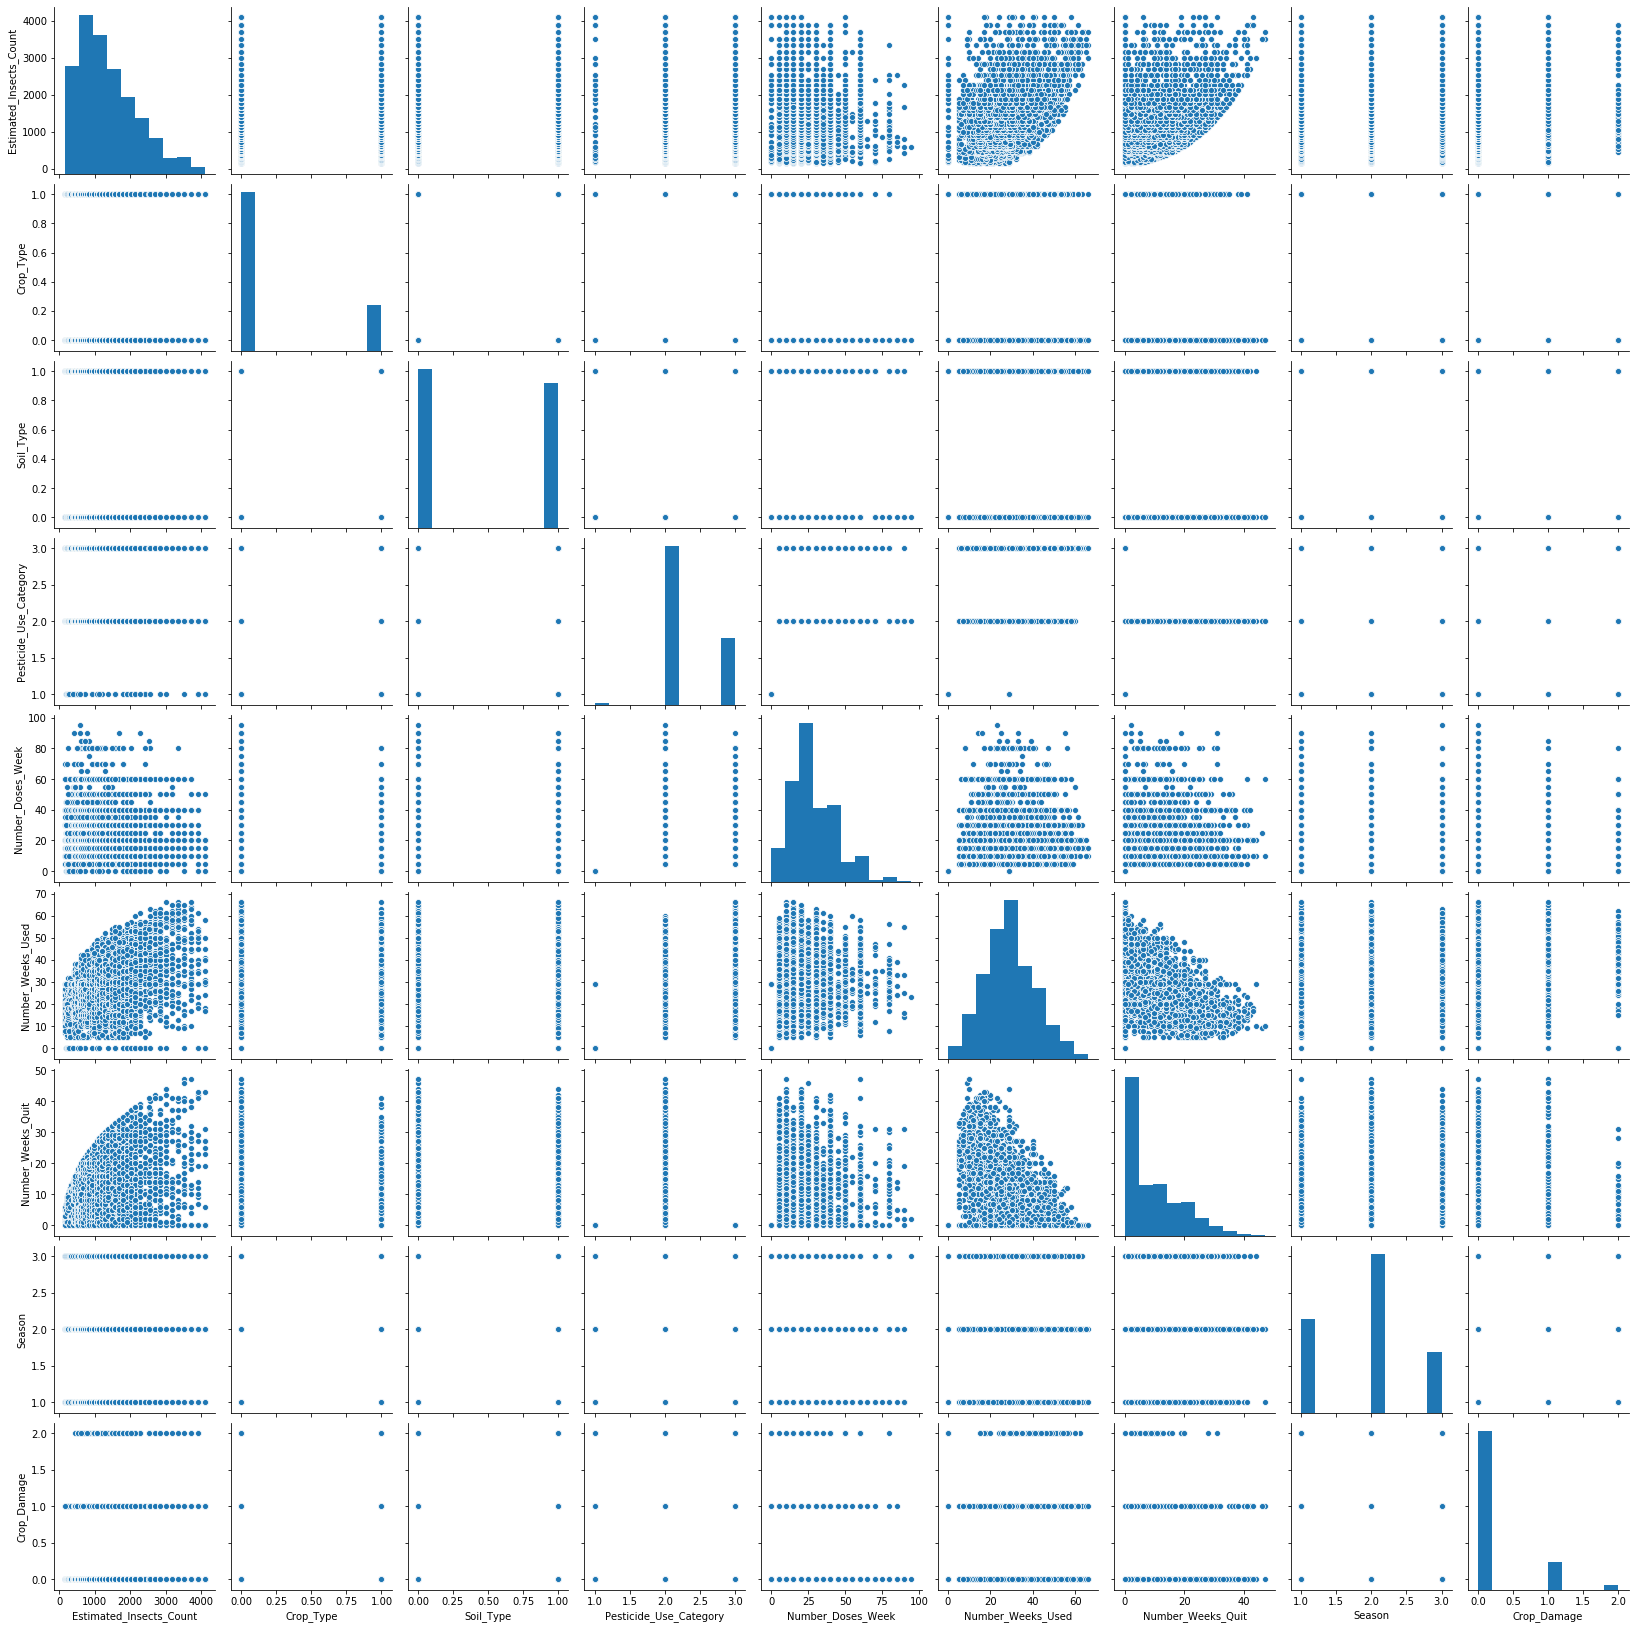

In [10]:
sns.pairplot(df1n)

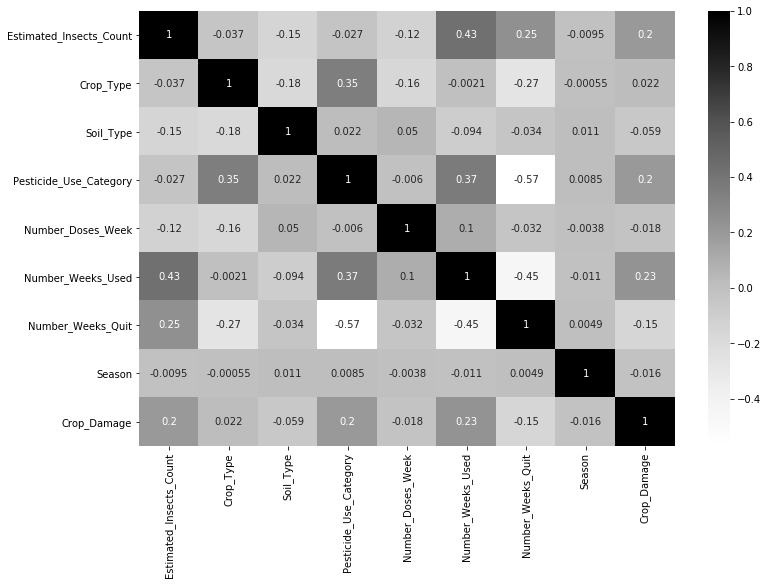

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df1n.corr(),cmap='Greys',annot=True)

In [12]:
x_train=df1n.iloc[:,0:-1] # Feature variables 
y_train=df1n.iloc[:,-1] # Target Variable 

In [13]:
x_train.shape,y_train.shape

((4599, 8), (4599,))

In [14]:
df2.info() 
# this is testing dataset which contains only feature columns. doesnt have target column values
#  dataset contains 1199 entries and 10 attributes
# datatype -> 1 object, others numerical (1 float & 8 integer)
# one feture attribute conatains missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [15]:
df2['Number_Weeks_Used']=df2['Number_Weeks_Used'].replace(np.NaN,df2['Number_Weeks_Used'].mean())
# filling the missing rows with mean value

In [16]:
df2n=df2.drop('ID',axis=1)
df2n.head()
# lets drop the ID column since its of no use to predict the outcome

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1


In [17]:
df2n.shape

(1199, 8)

In [18]:
x_test=df2n
# here there is no information availble for y_test. 

In [19]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train) 
# lets fit the multinomialnb algorithm to train the model 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
predmnb=mnb.predict(x_test)
predmnb
# lets predict the y_test 
# we cant check the accuracy score of the model since original dataset doesn't have y_test values to compare. 

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)